<a href="https://colab.research.google.com/github/ASingh-AGH/AI_Collab/blob/main/DLMIA%20Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 1 - Basic Operations, Gradient, Binary Images, Morphology

The goal of Laboratory 1 is to:
<ol>
  <li> Get familiar with basic input/output operations for 2-D images.
  <li> Implement basic functions using NumPy arrays (gradient of a 2-D image).
  <li> Get familiar with binary images and morphology operations.
  <li> Implement basic morphology operations: erosion, dilation, opening, closing.
</ol>


### Part I - Input/Output

Let's start with loading an exemplary 2-D image. The image is named "xray.jpg" and should be placed in the "Files" folder (/content).

However, the first thing to do is to load the necessary libraries.

In [1]:
import numpy as np # Basic interface in Python to N-dimensional arrays
from PIL import Image # Tool to load basic 2-D images
import matplotlib.pyplot as plt # Basic visualization for 1-D plots and 2-D images / data
import scipy.ndimage as nd # Useful functions to process N-dimensional arrays
# (e.g. morpohology operations for N-D images)
%matplotlib inline
# Jupyter specific command to directly show the visualizations


In [2]:
#MANUALLY UPLOAD XRAY.jpg

After importing the libraries - let's go into loading the exemplary "xray.jpg" and showing it using matplotlib.

Image shape: (598, 282)
Image dtype: uint8
Min/Max: (0, 255)
Image shape: (598, 282)
Image dtype: float32
Min/Max:(0.0, 1.0)


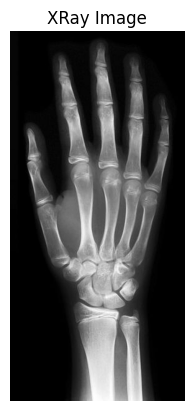

In [3]:
#DONE
"""
 Loads an image named “xray.jpg” and converts it to a NumPy array. 
 The image is then normalized to have values between 0 and 1. 
 Is shown in grayscale using matplotlib.
"""

image = Image.open("xray.jpg")
image = np.array(image) # Convert the image to NumPy array
print(f"Image shape: {image.shape}") 
print(f"Image dtype: {image.dtype}")

print(f"Min/Max: {image.min(), image.max()}")

image=image.astype(np.float32)
image=(image -np.min(image))/(np.max(image)-np.min(image))
image=image[:,:] #image=image[:,:,0] Indexing error fix 3->2

print(f"Image shape: {image.shape}") 
print(f"Image dtype: {image.dtype}")
print(f"Min/Max:{image.min(), image.max()}")

plt.figure(dpi=100)
plt.imshow(image, cmap='gray') # Show the image in grayscale
plt.axis('off') # Turn off the axis
plt.title("XRay Image")
plt.show()

### Part II - Calculating Image Gradient

The next task is to calculate the image gradient using a **np.gradient** function within NumPy.

X Gradient shape: (598, 282)
Y Gradient shape: (598, 282)


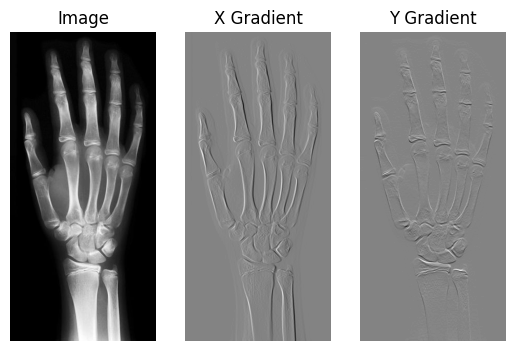

In [50]:
# DONE - use the np.gradient function to calculate the gradient
gradient = np.gradient(image)
row_gradient= gradient[0]
col_gradient = gradient[1]


print(f"X Gradient shape: {row_gradient.shape}")
print(f"Y Gradient shape: {col_gradient.shape}")

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()




One can observe that the gradient shows the regions of intensity changes with respect to a given direction. Calculating image (in general any N-dimensional function) gradient is a basic building block for numerous image processing tasks.

The next task is to define and implement a function called **our_gradient** that implements the same functionality as the **np.gradient** function. The result of the **our_gradient** function should be the same as of the **np.gradient**.

The function should implement the central differences:
$$ \frac{\partial f(x, y)}{\partial x} = \frac{f(x + 1, y) -  f(x - 1, y)}{2}$$
$$ \frac{\partial f(x, y)}{\partial y} = \frac{f(x, y + 1) -  f(x, y - 1)}{2}$$
, for each pair __(x, y)__ defining the 2-D image (hint: double for loop or proper array slicing/indexing).

In [51]:
#DONE
""" # Professors Explanation
Input: image
Gx = image(x,y) / dx = [image(x + 1, y) - image(x - 1, y)] / 2
Gx = image(x,y) / dy = [image(x, y + 1) - image(x, y - 1)] / 2

Gf(x,y)/dx = f(x+1,y) - f(x,y) #forward diffreences 
Gf(x,y)/dx = f(x+1,y) - f(x-1,y) #backward diffreences 

"""
#THERE ARE SOME ERRORS HERE IDK WHY BOTH EXAMPLE SHOWN IN CLASS AND BY PROFESSOR
"""
  for x in range(1, image.shape[1] - 1): #598 
    for y in range(1, image.shape[0] - 1): #282
      row_gradient[y,x] = ( (image[y + 1, x] - image[y - 1, x]) / 2 )
      col_gradient[y,x] = ( (image[y, x + 1] - image[y, x - 1]) / 2 )
  for x in range(0, image.shape[1]):
    row_gradient[0, x] = (image[0, x + 1] - image[0, x])
    col_gradient[-1,0] = (image[-1, x] - image[0, x - 1])
  for y in range(0, image.shape[0]): 
    row_gradient[y ,0] = (image[y, -1] - image[y - 1, 0])
    col_gradient[0,-1] = (image[y + 1 ,0] - image[y, 0])
  #IndexError: index 282 is out of bounds for axis 1 with size 282
"""
"""
#original prof solution code
def our_gradient(image):

  row_gradient = np.zeros_like(image) # initialize with zeros
  col_gradient = np.zeros_like(image) # initalize with zeros
  #taking advantage of python slicing 
  #to calc gradient in both directions using central diffrences
  row_gradient[1:-1] = ((image[2:, :] - image[0:-2,:]) / 2 ) 
  col_gradient[1:-1] = ((image[:, 2:] - image[:, 0:-2]) / 2 ) 

  row_gradient[0, :] = (image[1, :] - image[0, :]) 
  row_gradient[-1, :] =(image[-1, :] - image[-2, :])

  #fix indexing errors for gradient calc at edges of image
  col_gradient[:, 0] = (image[:, 1] - image[:, 0])
  col_gradient[:, -1] = (image[:, -1] - image[:, -2])
"""
#TRUBLE SHOOTING
print(image.shape)#(598, 282)
print(row_gradient.shape, col_gradient.shape)#(598, 282) (598, 282)

def our_gradient(image):

    row_gradient = np.zeros_like(image) # initialize with zeros
    col_gradient = np.zeros_like(image) # initalize with zeros


    row_gradient = np.zeros((image.shape[0]+1, image.shape[1]), dtype=float) #282
    col_gradient = np.zeros((image.shape[0], image.shape[1]+1), dtype=float) #596
    #col_gradient = np.zeros((image.shape[1] + 1, image.shape[1]), dtype=float) #596
    print(row_gradient.shape, col_gradient.shape)
    
    row_gradient[1:-1] = ((image[2:, :] - image[0:-2,:]) / 2 )  
    col_gradient[1:-1] = ((image[:, 2:] - image[:, 0:-2]) / 2 ) 

    row_gradient[0, :] = (image[1, :] - image[0, :]) 
    row_gradient[-1, :] =(image[-1, :] - image[-2, :])
    col_gradient[:, 0] = (image[:, 1] - image[:, 0])
    col_gradient[:, -1] = (image[:, -1] - image[:, -2])

    return row_gradient, col_gradient

  #ValueError: could not broadcast input array from shape (596,282) into shape (597,282)


"""
def our_gradient(image):
    row_gradient, col_gradient = np.gradient(image) #just to move on with everthing
    return row_gradient, col_gradient

    """

(598, 282)
(598, 282) (598, 282)


'\ndef our_gradient(image):\n    row_gradient, col_gradient = np.gradient(image) #just to move on with everthing\n    return row_gradient, col_gradient\n\n    '

Test whether the proposed function works correctly:

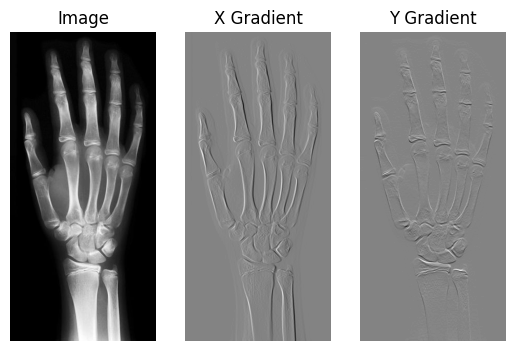

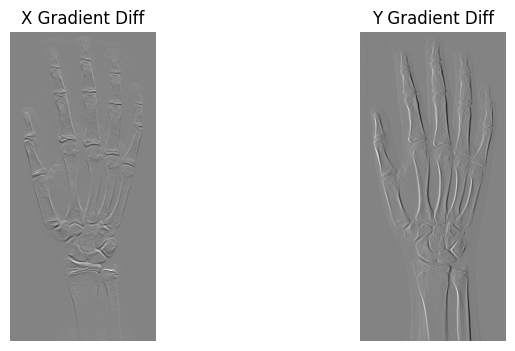

In [52]:
our_row_gradient, our_col_gradient = np.gradient(image)

# Again show the results - this time using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")
plt.subplot(1, 3, 2) #1,3,2
plt.imshow(our_col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")
plt.subplot(1, 3, 3) #1,3,3
plt.imshow(our_row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")
plt.show()

# Show difference images

#Moving on since far too much time has been spent on this and i dont know what to do anymore
#col_gradient, row_gradient = our_gradient(image)

plt.figure(dpi=100)
plt.subplot(1, 3, 1) # mid 2 
plt.imshow(row_gradient, cmap='gray') # TODO
plt.axis('off')
plt.title("X Gradient Diff")
plt.subplot(1, 3, 3) # 1, 2 , 2 
plt.imshow(col_gradient, cmap='gray') # TODO
plt.axis('off')
plt.title("Y Gradient Diff")
plt.show()

Moreover, perform a quantitative test by calculating the mean squared error (MSE) between the NumPy function and the implemented function:

In [53]:
# Calculate the mean squared error between NumPy function and the implemented function

#mse = lambda a, b: None # TODO - implement the mean squared error as lambda expression
mse = lambda a, b: np.mean((a - b)**2)
#ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
print(f"MSE between row gradients: {mse(row_gradient, our_row_gradient)}")
print(f"MSE between column gradients: {mse(col_gradient, our_col_gradient)}")

MSE between row gradients: 0.0
MSE between column gradients: 0.0


### Part III - Binary Images

The next part is dedicated to binary images.

Binary images contain only two discrete values (e.g. True/False, 0/1, 0/255). They are a special kind of images that are often a result of the image processing/analysis pipeline (e.g. binary segmentation of a tumor).

Let's start with defining two functions generating synethetic binary images - circle and rectangle.

In [ ]:
""" # Original for keepers sake
def generate_ciricle(x_size, y_size, x_origin, y_origin, radius):
	circle = None # TODO
	return circle

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	rectangle = None # TODO
	return rectangle
"""

def generate_circle(x_size, y_size, x_origin, y_origin, radius):
	circle = np.zeros((x_size, y_size))
	for x in range(x_size):
		for y in range(y_size):
			if ((x-x_origin)**2 + (y-y_origin)**2) <= radius**2:
				circle[x,y] = 1
	return circle

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
	rectangle = np.zeros((x_size, y_size))
	for x in range(x_size):
		for y in range(y_size):
			if (x >= x_b and x <= x_b + width) and (y >= y_b and y <= y_b + height):
				rectangle[x,y] = 1
	return rectangle

Let's try to use these functions to generate exemplary circle and rectangle.

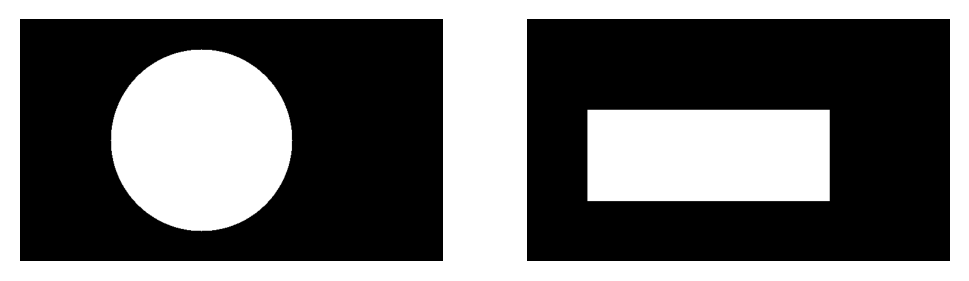

In [ ]:
#SWWAPPED Y AND X, Height and Width everywhere!!

y_size, x_size = 700, 400
y_origin, x_origin = 300, 200
radius = 150
y_b, x_b =  100, 150
height, width, = 400, 150
circle = generate_circle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

Both the circle are sucessfully generated. Let's add a bit of binary noise now - it will be useful in the next part of the notebook.

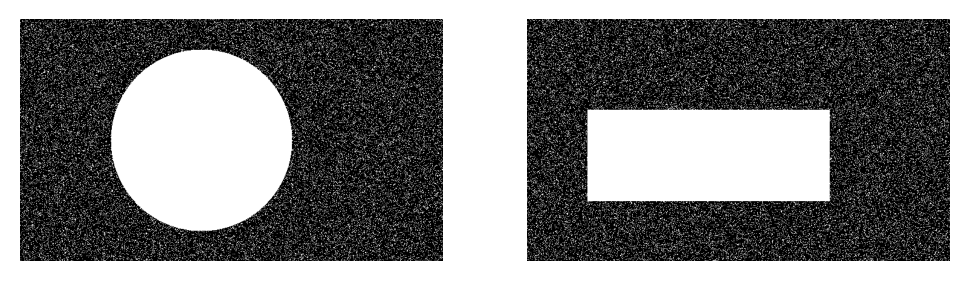

In [ ]:
#SWWAPPED Y AND X
circle = np.logical_or(circle, np.abs(np.random.randn(x_size, y_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(x_size, y_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

### Part IV - Morphological Operations

The most commonly used morphological operatons are:
<ol>
  <li> Erosion
  <li> Dilation
  <li> Opening (erosion followed by dilation)
  <li> Closing (dilation followed by erosion)
</ol>

They are common pre- or post-processing steps for binary images.

For a good description of morphological operations please visit: 
<ol>
 <li> https://en.wikipedia.org/wiki/Erosion_(morphology)
 <li> https://en.wikipedia.org/wiki/Dilation_(morphology)
 <li> https://en.wikipedia.org/wiki/Opening_(morphology)
 <li> https://en.wikipedia.org/wiki/Closing_(morphology)
</ol>

In this part you are going to use the function available in the SciPy library and then implement your own with similiar behavior.

Let's start with using the SciPy functions.

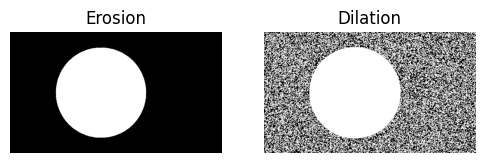

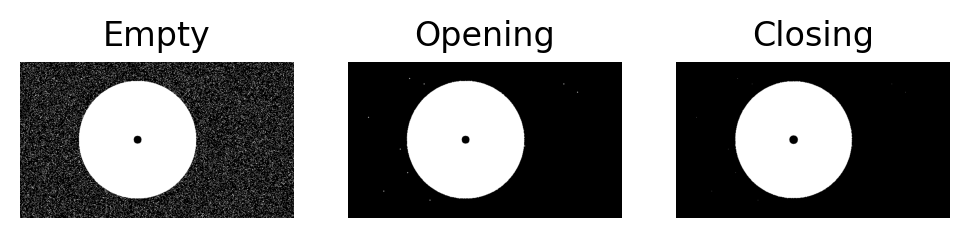

In [ ]:
eroded_circle = nd.binary_erosion(circle)  # TODO - perform binary erosion on the circle using SciPy
dilated_circle = nd.binary_dilation(circle) # TODO - perform binary dilation on the circle using SciPy
inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
opened_circle = nd.binary_opening(empty_circle) # TODO - perform binary opening on the "empty_circle" using SciPy
closed_opened_circle = nd.binary_erosion(opened_circle) # TODO - perform binary erosion on result of previous step using SciPy


plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

Now implement your own functions, performing the same operations.

In [ ]:
# erosion and dilation had a lot of code redundancy, made new function to decrease copying

def calc_se_bounds(x, y, se, x_size, y_size):
	se_start_x = x - (se.shape[0] // 2)
	se_end_x = x + (se.shape[0] // 2)
	se_start_y = y - (se.shape[1] // 2)
	se_end_y = y + (se.shape[1] // 2)
	clipped_se = se[max(se_start_x, 0):min(se_end_x, x_size),max(se_start_y, 0):min(se_end_y, y_size)]
	img_start_x = max(se_start_x, 0)
	img_end_x = min(se_end_x, x_size)
	img_start_y = max(se_start_y, 0)
	img_end_y = min(se_end_y, y_size)
	
	return clipped_se, img_start_x, img_end_x, img_start_y, img_end_y

def erosion(image, se):
	image_eroded = np.zeros_like(image)
	x_size, y_size = image.shape
	for x in range(x_size):
		for y in range(y_size):
			clipped_se, img_start_x, img_end_x, img_start_y, img_end_y = calc_se_bounds(x, y, se, x_size, y_size)
			if np.all(image[img_start_x:img_end_x, img_start_y:img_end_y] * clipped_se == clipped_se):
				image_eroded[x, y] = 1
	return image_eroded

def dilation(image, se):
	image_dilated = np.zeros_like(image)
	x_size, y_size = image.shape
	for x in range(x_size):
		for y in range(y_size):
			clipped_se, img_start_x, img_end_x, img_start_y, img_end_y = calc_se_bounds(x, y, se, x_size, y_size)
			if np.any(image[img_start_x:img_end_x, img_start_y:img_end_y] * clipped_se == clipped_se):
				image_dilated[x, y] = 1
	return image_dilated

In [ ]:

"""
def erosion(image, se):
	image_eroded = np.zeros_like(image)# new image of  same size as image
	x_size, y_size = image.shape# getting dimensions
	# Loop through each pixel in  image
	for x in range(x_size):
		for y in range(y_size):
			# Calculating start and end points of structuring element
			se_start_x = x - (se.shape[0] // 2)
			se_end_x = x + (se.shape[0] // 2)
			se_start_y = y - (se.shape[1] // 2)
			se_end_y = y + (se.shape[1] // 2)
			# Clip structuring element to image boundaries
			clipped_se = se[max(se_start_x, 0):min(se_end_x, x_size), max(se_start_y, 0):min(se_end_y, y_size)]
			# calculating start and end points of  image
			img_start_x = max(se_start_x, 0)
			img_end_x = min(se_end_x, x_size)
			img_start_y = max(se_start_y, 0)
			img_end_y = min(se_end_y, y_size)
			# Calculating erosion by comparing  image and structuring element
			if np.all(image[img_start_x:img_end_x, img_start_y:img_end_y] * clipped_se == clipped_se):
				image_eroded[x, y] = 1

	return image_eroded
"""
def opening(image, se):
	eroded = erosion(image, se)
	return dilation(eroded, se)

def closing(image, se):
	dilated = dilation(image, se)
	return erosion(dilated, se)

In [ ]:
#Since defining se was causing errors, best to have a variable function

def generate_se(image_size):
	x_size, y_size = image_size
	se = np.ones((x_size,y_size))
	return se

In [ ]:
# se replaced with generate_se(circle.shape) where image_size = image.shape inside generate_se function

#Taking ages to load, idk what the problem is

own_eroded_circle = erosion(circle, generate_se(circle.shape)) # TODO - perform binary erosion on the circle using the implemented function
own_dilated_circle = dilation(circle, generate_se(circle.shape)) # TODO - perform binary dilation on the circle using the implemented function
inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) # Create a circle with a hole
own_opened_circle = opening(empty_circle, generate_se(empty_circle.shape)) # TODO - perform binary opening on the "empty_circle" using the implemented function
own_closed_opened_circle = closing(opened_circle, generate_se(opened_circle.shape)) # TODO - perform binary erosion on result of previous step using the implemented function

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(own_eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(own_dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()
plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(own_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(own_closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()

KeyboardInterrupt: ignored

And also check the results quantitatively:

In [ ]:
# effectively new mse since it needed a bitwise operator and the above cannot be changed without error 
mse = lambda a, b: np.mean((a ^ b)**2)
print(f"MSE between erosions: {mse(own_eroded_circle, eroded_circle)}")
print(f"MSE between dilations: {mse(own_dilated_circle, dilated_circle)}")
print(f"MSE between closing results: {mse(own_closed_opened_circle, closed_opened_circle)}")
print(f"MSE between opening results: {mse(own_opened_circle, opened_circle)}")

MSE between erosions: 0.24968214285714285


NameError: ignored

### Conclusion

This is the end of Laboratory 1. You should be now familiar with:
<ol>
  <li> Loading 2-D images using PIL library.
  <li> Generating synthetic 2-D images.
  <li> Implementing basic functions like gradient calculation or morphology operations.
</ol>

The next laboratory will discuss the convolution/correlation operators and how to implement basic neural networks in PyTorch.